In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Linear Regression from Scratch: The Matrix Method

### Instead of using a pre-built library command to train a model, we will build 
### the mathematical engine of Linear Regression from scratch using NumPy.
###
### **The Math:** We are solving for the coefficients vector $B$ using the Normal Equation:
### $$ B = (X^T X)^{-1} X^T Y $$
###
### **The Dataset:** We will use the California Housing Dataset.



In [2]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import pandas as pd
import sklearn.metrics

## 1. Load and Prepare the Data
### We will use a real-world dataset. To keep our matrices readable and consistent 
### with the class tutorial, we will select only two features:
### 1. Median Income
### 2. House Age

In [3]:
california = fetch_california_housing()
feature_names = california.feature_names
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [4]:
# We extract column 0 (MedInc) and column 1 (HouseAge) to match the logic of having 2 IVs
# X_original shape will be (N, 2)
X_original = california.data[:, 0:2] 
Y_vector = california.target.reshape(-1, 1) # Ensure Y is a column vector (N, 1)

Y_vector.shape

(20640, 1)

In [5]:
# Let's verify the data looks correct by printing the first 5 rows
print("--- Raw Feature Data (First 5 rows) ---")
print(f"Features: {feature_names[0]}, {feature_names[1]}")
print(X_original[:5])
print("\n--- Target Data (First 5 rows) ---")
print("Target: Median House Value")
print(Y_vector[:5])

--- Raw Feature Data (First 5 rows) ---
Features: MedInc, HouseAge
[[ 8.3252 41.    ]
 [ 8.3014 21.    ]
 [ 7.2574 52.    ]
 [ 5.6431 52.    ]
 [ 3.8462 52.    ]]

--- Target Data (First 5 rows) ---
Target: Median House Value
[[4.526]
 [3.585]
 [3.521]
 [3.413]
 [3.422]]



## 2. Matrix Preprocessing (Constructing Matrix X)
 
### In the linear equation $y = b_0 + b_1x_1 + b_2x_2$, there is a constant term $b_0$ (the intercept).
# 
### In matrix algebra, to solve for $b_0$, we must add a column of **1s** to our Feature Matrix. 

In [6]:
# Create a column of ones with the same number of rows as our data
ones_column = np.ones((X_original.shape[0], 1))

In [7]:
# Stack the ones column with the original features
X_matrix = np.hstack((ones_column, X_original))

print("--- Processed X Matrix (First 5 rows) ---")
print(X_matrix[:5])
print(f"\nShape of X Matrix: {X_matrix.shape} (Rows, Columns)")


--- Processed X Matrix (First 5 rows) ---
[[ 1.      8.3252 41.    ]
 [ 1.      8.3014 21.    ]
 [ 1.      7.2574 52.    ]
 [ 1.      5.6431 52.    ]
 [ 1.      3.8462 52.    ]]

Shape of X Matrix: (20640, 3) (Rows, Columns)


## 3. Implementing the Normal Equation

### Now we solve for $B$.

### The Formula: $B = (X^T X)^{-1} X^T Y$


### Step 1: Calculate X Transpose (X^T)

In [8]:
X_matrix_T = X_matrix.T


print(f"Shape of X_T: {X_matrix_T.shape}")

Shape of X_T: (3, 20640)


### Step 2 : Calculate X Transpose times X (X^T X)
### This results in a square matrix (3x3 in our case)

In [9]:
X_T_X = np.matmul(X_matrix_T, X_matrix)

print("\n--- Matrix (X^T * X) ---")
print(X_T_X)


--- Matrix (X^T * X) ---
[[   20640.            79890.6495       591119.        ]
 [   79890.6495       383723.22873841  2229285.6834    ]
 [  591119.          2229285.6834     20198485.        ]]


### Step 3: Calculate Inverse of (X^T X)^(-1) 

In [10]:
try:
    X_T_X_Inv = np.linalg.inv(X_T_X)
    print("\n--- Inverse Matrix (X^T * X)^-1 ---")
    print(X_T_X_Inv)
except np.linalg.LinAlgError:
    print("Matrix is singulard cannot an be inverted.")


--- Inverse Matrix (X^T * X)^-1 ---
[[ 5.61212572e-04 -5.97145907e-05 -9.83353613e-06]
 [-5.97145907e-05  1.36170560e-05  2.44677818e-07]
 [-9.83353613e-06  2.44677818e-07  3.10287296e-07]]


### Step 4: Calculate (X^T X)^(-1) X^T Y 

In [11]:
# First we calculate the intermediate part: X^T * Y
X_T_Y = np.matmul(X_matrix_T, Y_vector)

In [12]:
# Now we calculate the final B vector
B = np.matmul(X_T_X_Inv, X_T_Y)

print("\n--- Calculated Coefficients (B Vector) ---")
print(B)


--- Calculated Coefficients (B Vector) ---
[[-0.10189033]
 [ 0.43169191]
 [ 0.01744134]]


## 4. Interpreting the Results
# 
### The vector $B$ contains our coefficients $[b_0, b_1, b_2]$.
# 
### * $b_0$: Intercept (Bias)
### * $b_1$: Weight for Median Income
### * $b_2$: Weight for House Age

In [13]:
b0 = B[0][0]
b1 = B[1][0]
b2 = B[2][0]

print("--- Final Model ---")
print(f"b0 (Intercept)    : {b0:.4f}")
print(f"b1 (Median Income): {b1:.4f}")
print(f"b2 (House Age)    : {b2:.4f}")
print("\nEquation:")
print(f"HouseValue = {b0:.2f} + ({b1:.2f} * Income) + ({b2:.2f} * Age)")

--- Final Model ---
b0 (Intercept)    : -0.1019
b1 (Median Income): 0.4317
b2 (House Age)    : 0.0174

Equation:
HouseValue = -0.10 + (0.43 * Income) + (0.02 * Age)



## 5. Verification
 
### Let's verify our manual matrix math against NumPy's built-in optimized solver `numpy.linalg.lstsq`.
### If our math is correct, the results should be identical.

### Using numpy's built-in least squares solver
### rcond=None ensures it handles machine precision warnings

In [14]:
results_verification = np.linalg.lstsq(X_matrix, Y_vector, rcond=None)[0]

print("--- Verification Results (NumPy Built-in) ---")
print(results_verification)

print("\n--- Do they match? ---")
is_close = np.allclose(B, results_verification)
print(f"Match Status: {is_close}")

--- Verification Results (NumPy Built-in) ---
[[-0.10189033]
 [ 0.43169191]
 [ 0.01744134]]

--- Do they match? ---
Match Status: True



## 6. Visualization
 
### Since we have 2 features ($x_1, x_2$), the result is a 3D Plane. 
### To make it easy to visualize in 2D, let's look at the relationship between **Income** and **Price** # while holding House Age constant (at its average).

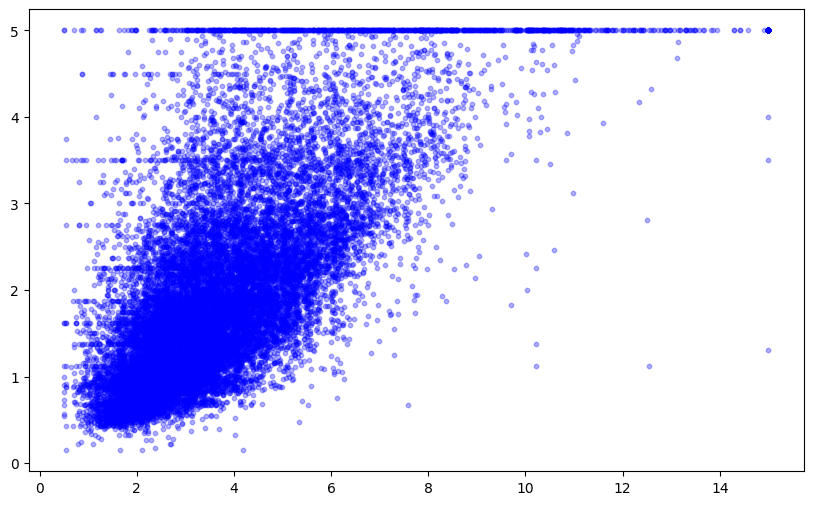

In [15]:
# 1. Plot the actual data points (Scatter)
plt.figure(figsize=(10, 6))
plt.scatter(X_original[:, 0], Y_vector, color='blue', alpha=0.3, label='Actual Data', s=10)



In [16]:
# 2. Create a line for prediction
# We create a range of income values from min to max
x1_range = np.linspace(X_original[:, 0].min(), X_original[:, 0].max(), 100)



In [17]:
# We hold House Age constant at its mean value
mean_age = X_original[:, 1].mean()

# Calculate predicted Y for this line using our coefficients
# y = b0 + b1*x1 + b2*(mean_age)
y_pred_line = b0 + (b1 * x1_range) + (b2 * mean_age)

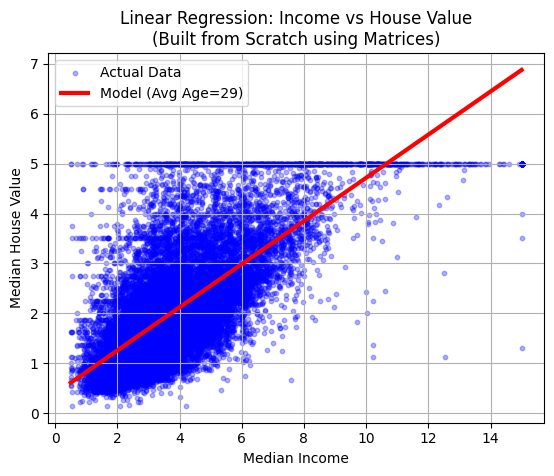

In [18]:
# 3. Plot the regression line on the scatter plot
plt.scatter(X_original[:, 0], Y_vector, color='blue', alpha=0.3, label='Actual Data', s=10)
plt.plot(x1_range, y_pred_line, color='red', linewidth=3, label=f'Model (Avg Age={mean_age:.0f})')

plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title(f'Linear Regression: Income vs House Value\n(Built from Scratch using Matrices)')
plt.legend()
plt.grid(True)
plt.show()


## 7. Test the Model
# 
### Change the `student_income` and `student_age` variables below to see what the model predicts!
### * Income is in units of $100,000 (e.g., 5.0 = $500,000)
### * Age is in years


In [19]:

# --- STUDENT INPUT ---
student_income = 5.0  # Enter income (e.g., 8.5 for $85k)
student_age = 20      # Enter house age (e.g., 10 years)
# ---------------------

# Calculate prediction manually using our B vector
predicted_value = b0 + (b1 * student_income) + (b2 * student_age)

# The dataset target is in units of 100,000, so we multiply by 100k for readability
print(f"--- Prediction for Income: {student_income} and Age: {student_age} ---")
print(f"Model Output Score: {predicted_value:.4f}")
print(f"Real World Price Estimate: ${predicted_value * 100000:,.2f}")


--- Prediction for Income: 5.0 and Age: 20 ---
Model Output Score: 2.4054
Real World Price Estimate: $240,539.61


In [20]:
# 1. Generate predictions for the WHOLE dataset using our matrix math
# Formula: Y_pred = X_matrix * B
Y_pred_all = np.matmul(X_matrix, B)

# --- Metric 1: RMSE (Root Mean Squared Error) ---
# Calculate the average squared difference between Actual and Predicted
mse = np.mean((Y_vector - Y_pred_all) ** 2)
rmse = np.sqrt(mse)

# --- Metric 2: R-Squared (Coefficient of Determination) ---
# Formula: 1 - (Sum of Squared Residuals / Total Sum of Squares)
ss_residual = np.sum((Y_vector - Y_pred_all) ** 2)
ss_total = np.sum((Y_vector - np.mean(Y_vector)) ** 2)
r2 = 1 - (ss_residual / ss_total)

print("--- Model Metrics (Calculated from Scratch) ---")
print(f"R-Squared Score : {r2:.4f} (The model explains {r2*100:.1f}% of the variance)")
print(f"RMSE Error      : {rmse:.4f} (On average, the model is off by ${rmse*100000:,.0f})")

# Note: Accuracy/Precision are not used here because this is Regression (predicting a number),
# not Classification (predicting a category like Yes/No).

--- Model Metrics (Calculated from Scratch) ---
R-Squared Score : 0.5091 (The model explains 50.9% of the variance)
RMSE Error      : 0.8085 (On average, the model is off by $80,848)


## Mini Exercises: Practice Linear Regression from Scratch

### 1. Compute the coefficient vector B
### 2. Make a prediction using the developed model

#### End of notebook